In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [6]:
df_prod = pd.read_csv('../data/imarpe/processed/df_produccion_combined_2002_2024_clean.csv')

df_prod['date'] = pd.to_datetime(df_prod['date'])

port_groups = [
    ['Paita', 'Parachique'],
    ['Chicama', 'Chimbote', 'Samanco', 'Tambo de Mora'],
    ['Huarmey', 'Casma'], 
    ['Supe', 'Vegueta', 'Huacho', 'Chancay', 'Callao'],
    ['Atico', 'Planchada', 'Mollendo', 'Ilo']
]

port_to_group = {}
for i, group in enumerate(port_groups):
    for port in group:
        port_to_group[port] = f'Group_{i+1}'

df_prod_grouped = pd.DataFrame()
df_prod_grouped['date'] = df_prod['date']

for i, group in enumerate(port_groups):
    group_name = f'Group_{i+1}'
    df_prod_grouped[group_name] = df_prod[group].sum(axis=1)


data_prod = df_prod_grouped.set_index('date')


In [7]:
df_prod['Atico']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7876    0.0
7877    0.0
7878    0.0
7879    0.0
7880    0.0
Name: Atico, Length: 7881, dtype: float64

/var/folders/8j/y_l8frxs2n19mq92k5pv4y100000gn/T/ipykernel_7314/174991813.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.date_range(start=start_date, end=end_date, freq='Y')
/var/folders/8j/y_l8frxs2n19mq92k5pv4y100000gn/T/ipykernel_7314/174991813.py:20: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ax.set_xticks(pd.date_range(start=start_date, end=end_date, freq='Y'))


[Text(11687.0, 0, '2001'),
 Text(12052.0, 0, '2002'),
 Text(12417.0, 0, '2003'),
 Text(12783.0, 0, '2004'),
 Text(13148.0, 0, '2005'),
 Text(13513.0, 0, '2006'),
 Text(13878.0, 0, '2007'),
 Text(14244.0, 0, '2008'),
 Text(14609.0, 0, '2009'),
 Text(14974.0, 0, '2010'),
 Text(15339.0, 0, '2011'),
 Text(15705.0, 0, '2012'),
 Text(16070.0, 0, '2013'),
 Text(16435.0, 0, '2014'),
 Text(16800.0, 0, '2015'),
 Text(17166.0, 0, '2016'),
 Text(17531.0, 0, '2017'),
 Text(17896.0, 0, '2018'),
 Text(18261.0, 0, '2019'),
 Text(18627.0, 0, '2020'),
 Text(18992.0, 0, '2021'),
 Text(19357.0, 0, '2022'),
 Text(19722.0, 0, '2023'),
 Text(20088.0, 0, '2024')]

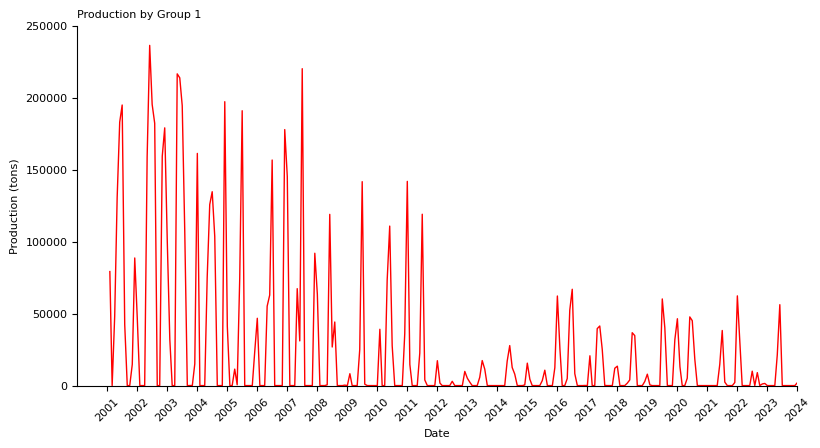

In [8]:
start_date = '2001-01-01'
end_date = '2024-12-31'

years = pd.date_range(start=start_date, end=end_date, freq='Y')

data = data_prod.resample('ME').sum()

fig = plt.figure(figsize=(8, 4))
ax = plt.axes([0.05, 0.05, 0.9, 0.9])
x_data = data.index
y_data = data['Group_1']
ax.plot(x_data, y_data, color='red', linewidth=1)
ax.set_ylabel('Production (tons)', fontsize=8)
ax.set_xlabel('Date', fontsize=8)
ax.set_title('Production by Group 1', fontsize=8, loc='left')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', labelsize=8)
ax.set_xlim([pd.to_datetime(start_date), pd.to_datetime(end_date)])
ax.set_xticks(pd.date_range(start=start_date, end=end_date, freq='Y'))
ax.set_ylim([0, 250000])
ax.set_xticklabels([d.strftime('%Y') for d in years], rotation=45)

In [9]:
cluster_ts = pd.read_csv('../data/MODIS/processed/cluster_time_series.csv', index_col=0)
cluster_ts.index = pd.to_datetime(cluster_ts.index)

In [10]:

start_date = max(data_prod.index.min(), cluster_ts.index.min())
end_date = min(data_prod.index.max(), cluster_ts.index.max())

data_prod = data_prod.loc[start_date:end_date]
cluster_ts = cluster_ts.loc[start_date:end_date]

df_combined = pd.merge(data_prod, cluster_ts, left_index=True, right_index=True)

In [11]:
df_combined


,Group_1,Group_2,Group_3,Group_4,Group_5,outer_0_inner_0,outer_0_inner_1,outer_0_inner_2,outer_0_inner_3,outer_1_inner_0,...,outer_1_inner_2,outer_1_inner_3,outer_2_inner_0,outer_2_inner_1,outer_2_inner_2,outer_2_inner_3,outer_3_inner_0,outer_3_inner_1,outer_3_inner_2,outer_3_inner_3
2002-07-04,1593.0,376.00000,0.0,455.000,10145.000,-1.202439,-0.073378,-0.689899,-0.299439,-0.212267,...,-1.299685,-0.826269,-2.114231,-1.785726,-2.213799,-1.617606,-0.675077,-0.144872,-0.288744,-0.222285
2002-07-05,716.0,143.00000,0.0,0.000,10178.000,-1.179530,-0.040669,-0.466723,-0.271318,-0.176436,...,-1.239057,-0.792234,-1.901213,-1.738019,-2.165749,-1.540411,-0.624346,-0.109211,-0.227504,-0.188807
2002-07-06,122.0,91.00000,0.0,0.000,7388.000,-1.245062,-0.115002,-0.499881,-0.408180,-0.156849,...,-1.210006,-0.739667,-1.986693,-1.726147,-2.391596,-1.635538,-0.575888,-0.148064,-0.195506,-0.144137
2002-07-07,93.0,1245.00000,500.0,0.000,6932.000,-1.110904,-0.063149,-0.451011,-0.422228,-0.134391,...,-1.122714,-0.711750,-1.690321,-1.616516,-2.124214,-1.390165,-0.622222,-0.144358,-0.151792,-0.170153
2002-07-08,1780.0,4015.00000,0.0,2360.000,8224.000,-1.055595,-0.020106,-0.472525,-0.351693,-0.078910,...,-1.132004,-0.642314,-1.696558,-1.621410,-2.116237,-1.384989,-0.560701,-0.149360,-0.095657,-0.177470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,0.0,10347.53000,0.0,8569.240,710.318,-0.410101,-0.311354,0.034113,-0.522287,-0.271088,...,-0.172862,-1.027327,0.207731,-0.563844,-0.092179,-0.906791,-0.405472,-0.400094,-0.424391,-0.135808
2024-12-28,0.0,3322.96147,0.0,9053.840,751.795,-0.327606,-0.305199,0.142271,-0.460473,-0.183971,...,-0.076198,-1.012067,0.201522,-0.513169,-0.115934,-0.946846,-0.340113,-0.459864,-0.397711,0.061575
2024-12-29,0.0,1701.26500,0.0,7365.365,0.000,-0.293628,-0.305072,0.151726,-0.470747,-0.164676,...,-0.112765,-0.997521,0.157582,-0.522240,-0.154570,-1.012413,-0.334767,-0.376435,-0.189898,0.047580
2024-12-30,0.0,5935.96000,0.0,7472.405,0.000,-0.181702,-0.237012,0.289467,-0.415705,-0.134112,...,-0.085920,-0.987125,0.198860,-0.411803,-0.226644,-0.996259,-0.314431,-0.106140,0.127025,0.324714


In [20]:
clusters = cluster_ts.columns.tolist()  # Usamos los nombres de columnas existentes


In [36]:
results = []
for col in data_prod.columns:
    print(f"Processing {col}")
        
    for cluster in clusters:     
        print(cluster)
        data = df_combined[[cluster, col]].dropna()
        data = data[data[col] != 0]
        data = data[data[col] != np.inf]
        # Q1 = data[col].quantile(0.25)
        # Q3 = data[col].quantile(0.75)
        # IQR = Q3 - Q1
        # lower_bound = Q1 - 1.5 * IQR
        # upper_bound = Q3 + 1.5 * IQR
        # data_clean = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

        data_clean = data.copy()
        
        slope, intercept, r_value, p_value, std_err = stats.linregress(
            data_clean[cluster].astype(float), 
            data_clean[col]
        )
           
        
        results.append({
            'Variable': col,
            'Cluster': cluster,
            'Slope': slope,
            'Intercept': intercept,
            'R-value': r_value,
            'R-squared': r_value**2,
            'P-value': p_value,
#            'N_points': len(data)
        })

results_df = pd.DataFrame(results)

results_df['R-value'] = results_df['R-value'].round(3)
results_df['R-squared'] = results_df['R-squared'].round(3)
results_df['P-value'] = results_df['P-value'].round(3)
results_df['Slope'] = results_df['Slope'].round(3)
results_df['Intercept'] = results_df['Intercept'].round(3)

results_df



Processing Group_1
outer_0_inner_0
outer_0_inner_1
outer_0_inner_2
outer_0_inner_3
outer_1_inner_0
outer_1_inner_1
outer_1_inner_2
outer_1_inner_3
outer_2_inner_0
outer_2_inner_1
outer_2_inner_2
outer_2_inner_3
outer_3_inner_0
outer_3_inner_1
outer_3_inner_2
outer_3_inner_3
Processing Group_2
outer_0_inner_0
outer_0_inner_1
outer_0_inner_2
outer_0_inner_3
outer_1_inner_0
outer_1_inner_1
outer_1_inner_2
outer_1_inner_3
outer_2_inner_0
outer_2_inner_1
outer_2_inner_2
outer_2_inner_3
outer_3_inner_0
outer_3_inner_1
outer_3_inner_2
outer_3_inner_3
Processing Group_3
outer_0_inner_0
outer_0_inner_1
outer_0_inner_2
outer_0_inner_3
outer_1_inner_0
outer_1_inner_1
outer_1_inner_2
outer_1_inner_3
outer_2_inner_0
outer_2_inner_1
outer_2_inner_2
outer_2_inner_3
outer_3_inner_0
outer_3_inner_1
outer_3_inner_2
outer_3_inner_3
Processing Group_4
outer_0_inner_0
outer_0_inner_1
outer_0_inner_2
outer_0_inner_3
outer_1_inner_0
outer_1_inner_1
outer_1_inner_2
outer_1_inner_3
outer_2_inner_0
outer_2_inne

,Variable,Cluster,Slope,Intercept,R-value,R-squared,P-value
0,Group_1,outer_0_inner_0,-1374.717,3955.783,-0.253,0.064,0.000
1,Group_1,outer_0_inner_1,-1656.372,3898.041,-0.259,0.067,0.000
2,Group_1,outer_0_inner_2,-1538.207,3799.415,-0.278,0.077,0.000
3,Group_1,outer_0_inner_3,-1453.492,3956.793,-0.231,0.053,0.000
4,Group_1,outer_1_inner_0,-1262.052,3903.949,-0.186,0.035,0.000
...,...,...,...,...,...,...,...
75,Group_5,outer_2_inner_3,121.365,2860.948,0.044,0.002,0.015
76,Group_5,outer_3_inner_0,-58.613,2825.637,-0.010,0.000,0.580
77,Group_5,outer_3_inner_1,-100.695,2814.233,-0.016,0.000,0.359
78,Group_5,outer_3_inner_2,233.836,2866.548,0.039,0.002,0.030


(-0.5, 0.5)

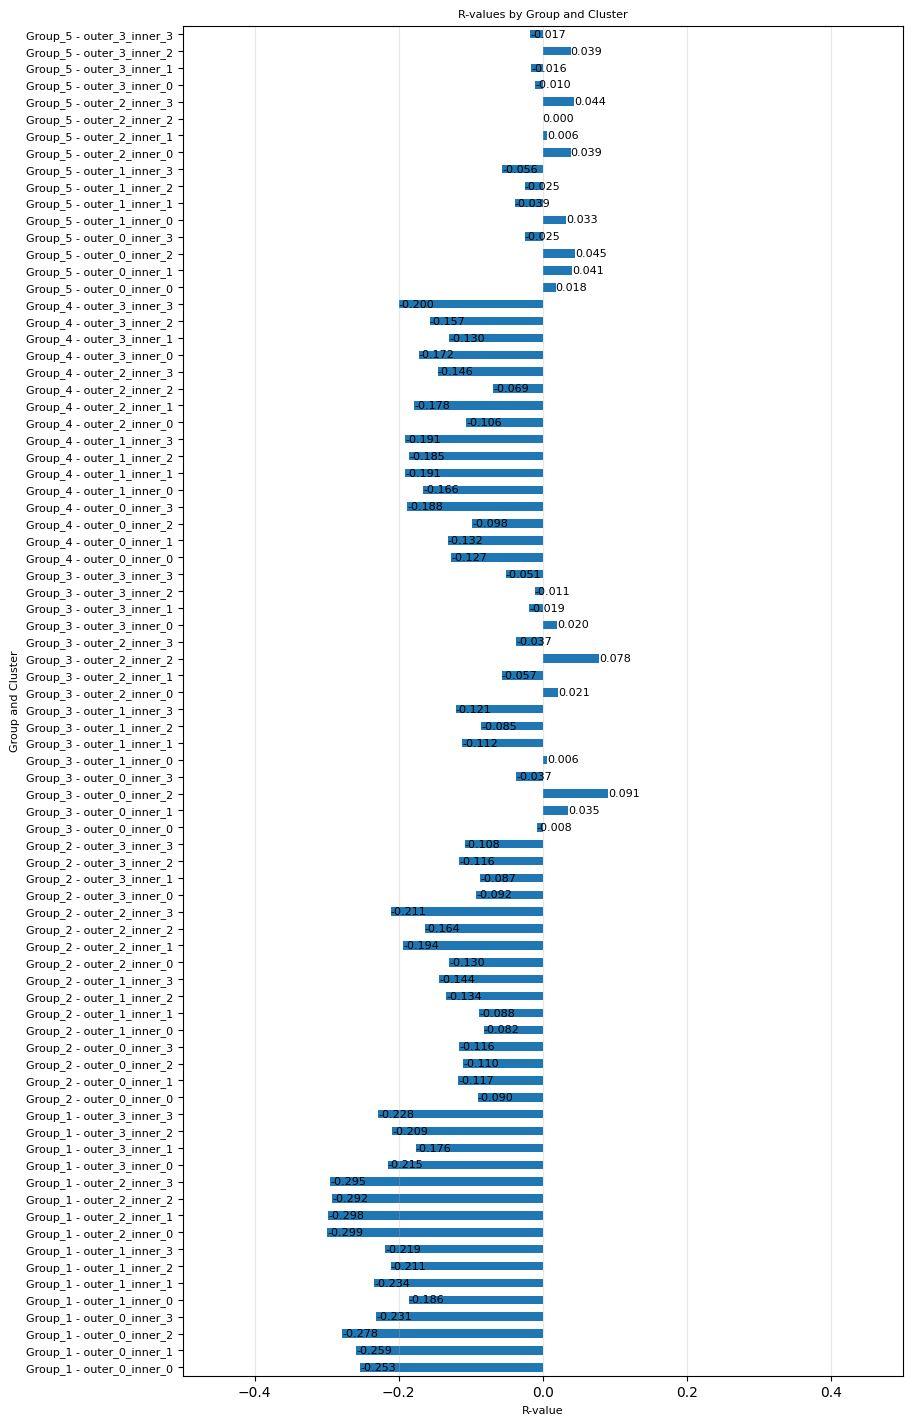

In [38]:
fig = plt.figure(figsize=(8, 15))

ax = plt.axes([0.05, 0.05, 0.9, 0.9])
bars = results_df['R-value'].plot(kind='barh', ax=ax)

for i, v in enumerate(results_df['R-value']):
    if v >= 0:
        bars.text(v, i, f'{v:.3f}', va='center', fontsize=8)
    else:
        bars.text(v, i, f'{v:.3f}', va='center', fontsize=8)

ax.set_title('R-values by Group and Cluster', fontsize=8)
ax.set_xlabel('R-value', fontsize=8)
ax.set_ylabel('Group and Cluster', fontsize=8)

ax.set_yticks(range(len(results_df)), 
          [f"{row['Variable']} - {row['Cluster']}" for _, row in results_df.iterrows()],
          fontsize=8)

ax.grid(axis='x', alpha=0.3)
ax.set_xlim(-0.5, 0.5)

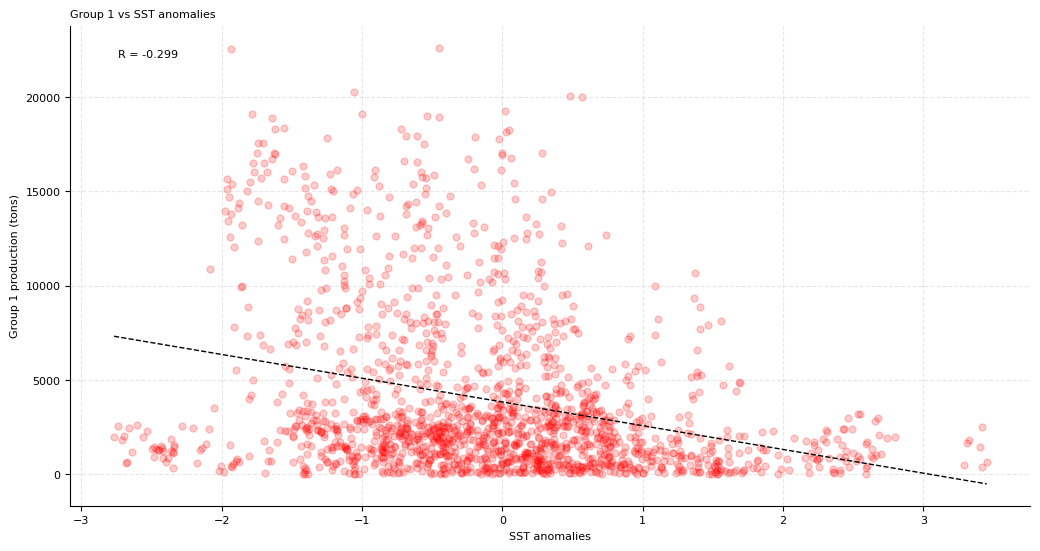

In [109]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Create scatter plot
fig = plt.figure(figsize=(12, 6))
ax = plt.axes([0.1, 0.1, 0.8, 0.8])

# Get initial data and remove zeros and infinites
data = df_combined[['outer_2_inner_0', 'Group_1']].dropna()
data = data[data['Group_1'] != 0]
data = data[data['Group_1'] != np.inf]

# Clean data by removing outliers
Q1_cluster = data['outer_2_inner_0'].quantile(0.15)
Q3_cluster = data['outer_2_inner_0'].quantile(0.85)
IQR_cluster = Q3_cluster - Q1_cluster

Q1_prod = data['Group_1'].quantile(0.15)
Q3_prod = data['Group_1'].quantile(0.85)
IQR_prod = Q3_prod - Q1_prod

# More subtle cleaning using wider IQR range
data_clean = data[
    (data['outer_2_inner_0'] >= Q1_cluster - 2 * IQR_cluster) &
    (data['outer_2_inner_0'] <= Q3_cluster + 2 * IQR_cluster) &
    (data['Group_1'] >= Q1_prod - 2 * IQR_prod) &
    (data['Group_1'] <= Q3_prod + 2 * IQR_prod)
]

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(
    data_clean['outer_2_inner_0'].astype(float), 
    data_clean['Group_1']
)

# Create scatter plot with clean data
ax.scatter(data_clean['outer_2_inner_0'], data_clean['Group_1'], 
          color='red', alpha=0.2, s=25)

# Add linear regression line
x_reg = np.array([data_clean['outer_2_inner_0'].min(), data_clean['outer_2_inner_0'].max()])
y_reg = slope * x_reg + intercept
ax.plot(x_reg, y_reg, color='black', linestyle='--', linewidth=1)

# Add R-value text
ax.text(0.05, 0.95, 
        f'R = {r_value:.3f}', 
        transform=ax.transAxes, fontsize=8,
        verticalalignment='top')

# Customize plot
ax.set_xlabel('SST anomalies', fontsize=8)
ax.set_ylabel('Group 1 production (tons)', fontsize=8)
ax.set_title('Group 1 vs SST anomalies', fontsize=8, loc='left')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set tick parameters
ax.tick_params(axis='both', labelsize=8)

# Add grid
ax.grid(True, linestyle='--', alpha=0.3)

# Save plot as SVG
plt.savefig('scatter_group1_cluster.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show() 